## SHREE KRISHNA KANTH S
## 225229136
## II MSc DATA SCIENCE "A"
## PDL LAB 11

### STEP 1

In [1]:
## SHREE KRISHNA KANTH S
## 225229136
## II MSc DATA SCIENCE "A"
## PDL LAB 11

In [2]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Flatten, Dense, MaxPooling2D
import matplotlib.pyplot as plt
import time

In [3]:
def create_and_train_cnn(num_filters):
    # Load the MNIST dataset
    (x_train, y_train), (x_test, y_test) = mnist.load_data()

    # Normalize and reshape the data
    x_train = x_train.reshape(-1, 28, 28, 1) / 255.0
    x_test = x_test.reshape(-1, 28, 28, 1) / 255.0

    # Create the CNN model
    model = Sequential([
        Conv2D(num_filters, (3, 3), activation='relu', input_shape=(28, 28, 1)),
        Flatten(),
        Dense(10, activation='softmax')  # Output layer for 10 digits
    ])

    # Compile the model
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

    # Train the model
    history = model.fit(x_train, y_train, epochs=5, validation_data=(x_test, y_test))

    return model, history

In [4]:
# Create a list of different number of filters to experiment with
num_filters_list = [4, 6, 128, 512, 2056]
models = []
histories = []

In [5]:
print("\n" + "=" * 40)
print("Training and Evaluating CNN Models")
print("=" * 40)

# Create and train models for different number of filters
for num_filters in num_filters_list:
    print(f"\nNumber of Filters: {num_filters}")
    model, history = create_and_train_cnn(num_filters)
    models.append(model)
    histories.append(history)

    print("=" * 120)


Training and Evaluating CNN Models

Number of Filters: 4
11490434/11490434 [==============================] - 2s 0us/step
Epoch 1/5
1875/1875 [==============================] - 17s 3ms/step - loss: 0.3305 - accuracy: 0.9064 - val_loss: 0.1914 - val_accuracy: 0.9455
Epoch 2/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1717 - accuracy: 0.9503 - val_loss: 0.1391 - val_accuracy: 0.9614
Epoch 3/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1227 - accuracy: 0.9647 - val_loss: 0.1124 - val_accuracy: 0.9670
Epoch 4/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0929 - accuracy: 0.9729 - val_loss: 0.0893 - val_accuracy: 0.9726
Epoch 5/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0772 - accuracy: 0.9775 - val_loss: 0.0880 - val_accuracy: 0.9727

Number of Filters: 6
Epoch 1/5
1875/1875 [==============================] - 7s 3ms/step - loss: 0.2775 - accuracy: 0.9230 - val_loss: 0.1408 - val_accuracy: 0.9

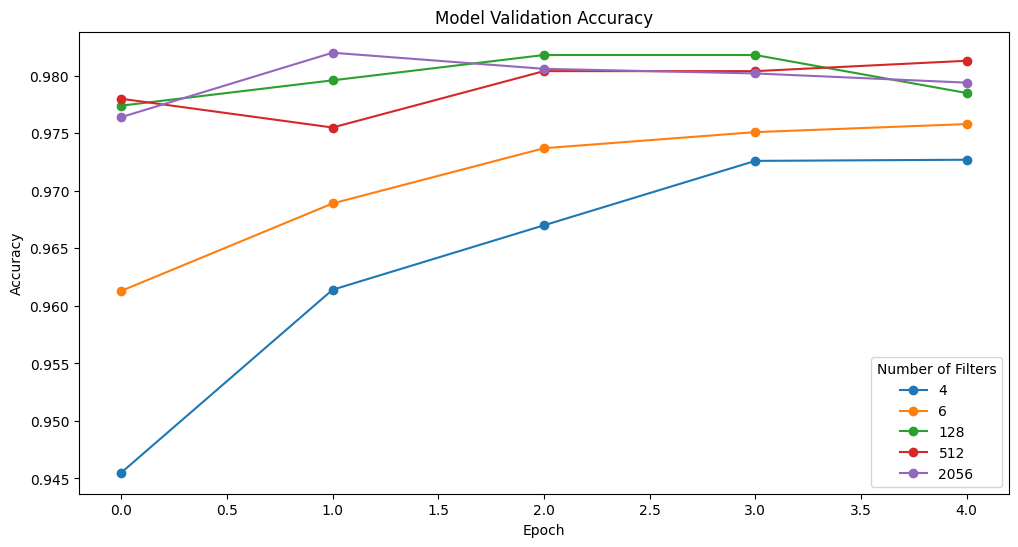

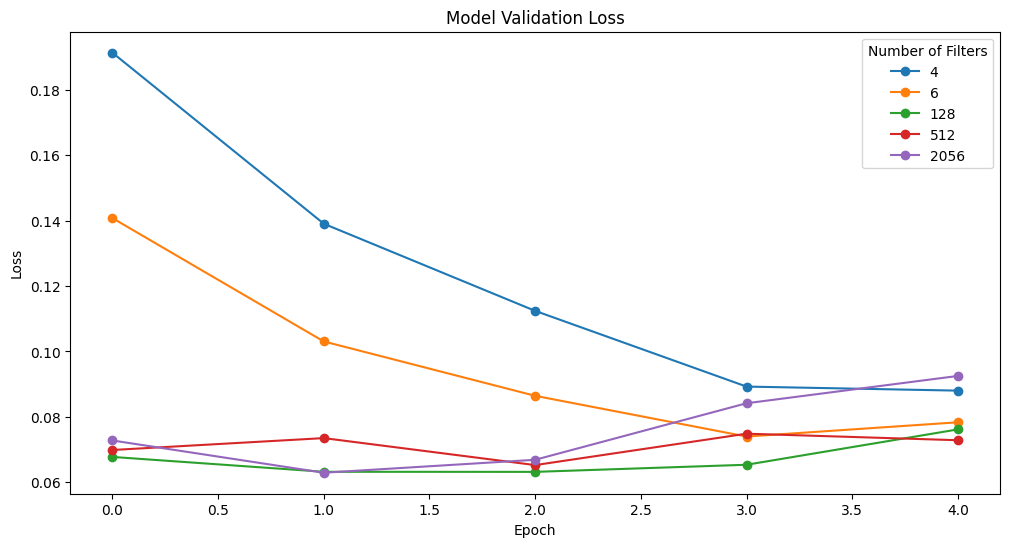

Best model's summary:
Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 26, 26, 512)       5120      
                                                                 
 flatten_3 (Flatten)         (None, 346112)            0         
                                                                 
 dense_3 (Dense)             (None, 10)                3461130   
                                                                 
Total params: 3,466,250
Trainable params: 3,466,250
Non-trainable params: 0
_________________________________________________________________


In [6]:
# Visualize accuracy and loss
plt.figure(figsize=(12, 6))

for history in histories:
    plt.plot(history.history['val_accuracy'], marker='o')

plt.title('Model Validation Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(num_filters_list, title='Number of Filters')
plt.show()

plt.figure(figsize=(12, 6))

for history in histories:
    plt.plot(history.history['val_loss'], marker='o')

plt.title('Model Validation Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(num_filters_list, title='Number of Filters')
plt.show()

# Find the best model based on validation accuracy
best_model_index = max(range(len(histories)), key=lambda i: histories[i].history['val_accuracy'][-1])
best_model = models[best_model_index]
print("Best model's summary:")
best_model.summary()

### STEP 2

In [7]:
def run_cnn(num_conv_layers, num_filters, num_epochs):
    # Load the MNIST dataset
    (x_train, y_train), (x_test, y_test) = mnist.load_data()

    # Normalize and reshape the data
    x_train = x_train.reshape(-1, 28, 28, 1) / 255.0
    x_test = x_test.reshape(-1, 28, 28, 1) / 255.0

    # Create the CNN model
    model = Sequential()

    for _ in range(num_conv_layers):
        model.add(Conv2D(num_filters, (3, 3), activation='relu', input_shape=(28, 28, 1)))

    model.add(Flatten())
    model.add(Dense(10, activation='softmax'))

    # Compile the model
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

    # Train the model and measure training time
    start_time = time.time()
    history = model.fit(x_train, y_train, epochs=num_epochs, validation_data=(x_test, y_test))
    end_time = time.time()
    training_time = end_time - start_time

    # Calculate training and testing accuracies
    train_accuracy = history.history['accuracy'][-1]
    test_accuracy = history.history['val_accuracy'][-1]

    # Calculate the number of parameters
    num_parameters = model.count_params()

    return history, train_accuracy, test_accuracy, num_parameters, training_time

In [8]:
num_conv_layers_list = [1, 2, 3, 4]
num_filters = 32
num_epochs = 5

histories = []
train_accuracies = []
test_accuracies = []
num_parameters_list = []
training_times = []

print("\n" + "=" * 40)
print("Training and Evaluating CNN Models")
print("=" * 40)

# Run models for different numbers of convolutional layers
for num_conv_layers in num_conv_layers_list:
    print(f"\nNumber of Conv Layers: {num_conv_layers}")
    history, train_accuracy, test_accuracy, num_parameters, training_time = run_cnn(num_conv_layers, num_filters, num_epochs)
    histories.append(history)
    train_accuracies.append(train_accuracy)
    test_accuracies.append(test_accuracy)
    num_parameters_list.append(num_parameters)
    training_times.append(training_time)
    print("=" * 120)


Training and Evaluating CNN Models

Number of Conv Layers: 1
Epoch 1/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1730 - accuracy: 0.9498 - val_loss: 0.0795 - val_accuracy: 0.9748
Epoch 2/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0666 - accuracy: 0.9801 - val_loss: 0.0682 - val_accuracy: 0.9793
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0494 - accuracy: 0.9848 - val_loss: 0.0666 - val_accuracy: 0.9797
Epoch 4/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0370 - accuracy: 0.9884 - val_loss: 0.0696 - val_accuracy: 0.9791
Epoch 5/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0284 - accuracy: 0.9912 - val_loss: 0.0690 - val_accuracy: 0.9795

Number of Conv Layers: 2
Epoch 1/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1239 - accuracy: 0.9633 - val_loss: 0.0544 - val_accuracy: 0.9828
Epoch 2/5
1875/1875 [==============================] -

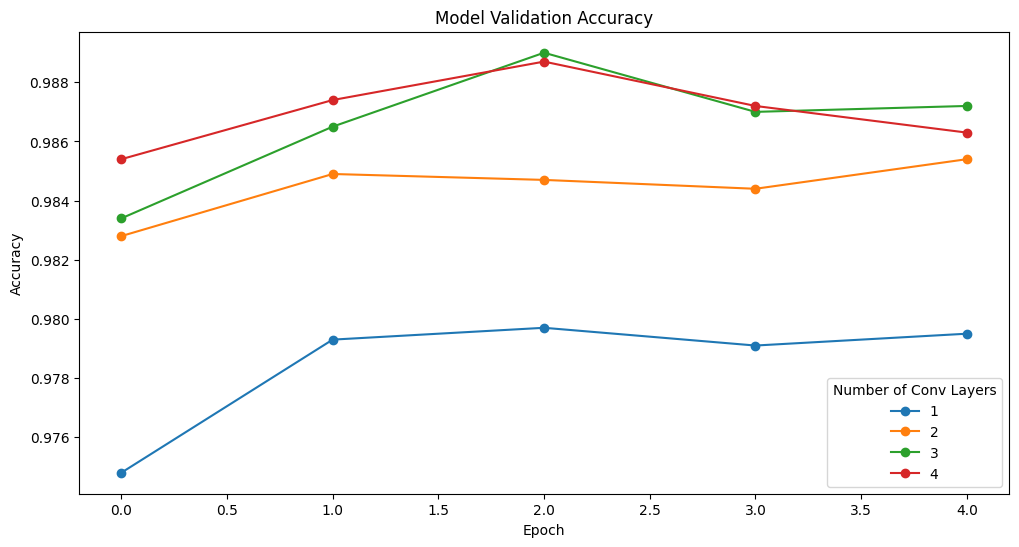


Best Model Information:
Number of Conv Layers: 3
Training Accuracy: 0.9952
Test Accuracy: 0.9872
Number of Parameters: 173706
Training Time: 38.79 seconds


In [9]:
# Visualize accuracy and loss
plt.figure(figsize=(12, 6))

for history in histories:
    plt.plot(history.history['val_accuracy'], marker='o')

plt.title('Model Validation Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(num_conv_layers_list, title='Number of Conv Layers')
plt.show()

# Find the best model based on test accuracy
best_model_index = max(range(len(test_accuracies)), key=lambda i: test_accuracies[i])
best_num_conv_layers = num_conv_layers_list[best_model_index]
best_train_accuracy = train_accuracies[best_model_index]
best_test_accuracy = test_accuracies[best_model_index]
best_num_parameters = num_parameters_list[best_model_index]
best_training_time = training_times[best_model_index]

print("\n" + "=" * 40)
print("Best Model Information:")
print("=" * 40)
print(f"Number of Conv Layers: {best_num_conv_layers}")
print(f"Training Accuracy: {best_train_accuracy:.4f}")
print(f"Test Accuracy: {best_test_accuracy:.4f}")
print(f"Number of Parameters: {best_num_parameters}")
print(f"Training Time: {best_training_time:.2f} seconds")

### STEP 3

In [10]:
def run_cnn_with_different_filter_sizes(filter_size, num_epochs):
    # Load the MNIST dataset
    (x_train, y_train), (x_test, y_test) = mnist.load_data()

    # Normalize and reshape the data
    x_train = x_train.reshape(-1, 28, 28, 1) / 255.0
    x_test = x_test.reshape(-1, 28, 28, 1) / 255.0

    # Create the CNN model
    model = Sequential([
        Conv2D(16, filter_size, activation='relu', input_shape=(28, 28, 1)),
        Conv2D(16, filter_size, activation='relu'),
        Flatten(),
        Dense(10, activation='softmax')
    ])

    # Compile the model
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

    # Train the model and measure training time
    start_time = time.time()
    history = model.fit(x_train, y_train, epochs=num_epochs, validation_data=(x_test, y_test))
    end_time = time.time()
    training_time = end_time - start_time

    # Calculate training and testing accuracies
    train_accuracy = history.history['accuracy'][-1]
    test_accuracy = history.history['val_accuracy'][-1]

    # Calculate the number of parameters
    num_parameters = model.count_params()

    return history, train_accuracy, test_accuracy, num_parameters, training_time

In [11]:
filter_sizes_list = [(3, 3), (5, 5), (7, 7)]
num_epochs = 5

histories = []
train_accuracies = []
test_accuracies = []
num_parameters_list = []
training_times = []

print("\n" + "=" * 40)
print("Training and Evaluating CNN Models")
print("=" * 40)

# Run models for different filter sizes
for filter_size in filter_sizes_list:
    print(f"\nFilter Size: {filter_size}")
    history, train_accuracy, test_accuracy, num_parameters, training_time = run_cnn_with_different_filter_sizes(filter_size, num_epochs)
    histories.append(history)
    train_accuracies.append(train_accuracy)
    test_accuracies.append(test_accuracy)
    num_parameters_list.append(num_parameters)
    training_times.append(training_time)
    print("=" * 120)


Training and Evaluating CNN Models

Filter Size: (3, 3)
Epoch 1/5
1875/1875 [==============================] - 9s 4ms/step - loss: 0.1599 - accuracy: 0.9530 - val_loss: 0.0675 - val_accuracy: 0.9786
Epoch 2/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0574 - accuracy: 0.9825 - val_loss: 0.0564 - val_accuracy: 0.9808
Epoch 3/5
1875/1875 [==============================] - 7s 3ms/step - loss: 0.0419 - accuracy: 0.9872 - val_loss: 0.0441 - val_accuracy: 0.9856
Epoch 4/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0301 - accuracy: 0.9904 - val_loss: 0.0476 - val_accuracy: 0.9853
Epoch 5/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0227 - accuracy: 0.9924 - val_loss: 0.0509 - val_accuracy: 0.9861

Filter Size: (5, 5)
Epoch 1/5
1875/1875 [==============================] - 9s 4ms/step - loss: 0.1334 - accuracy: 0.9601 - val_loss: 0.0427 - val_accuracy: 0.9854
Epoch 2/5
1875/1875 [==============================] - 6s 3ms/st

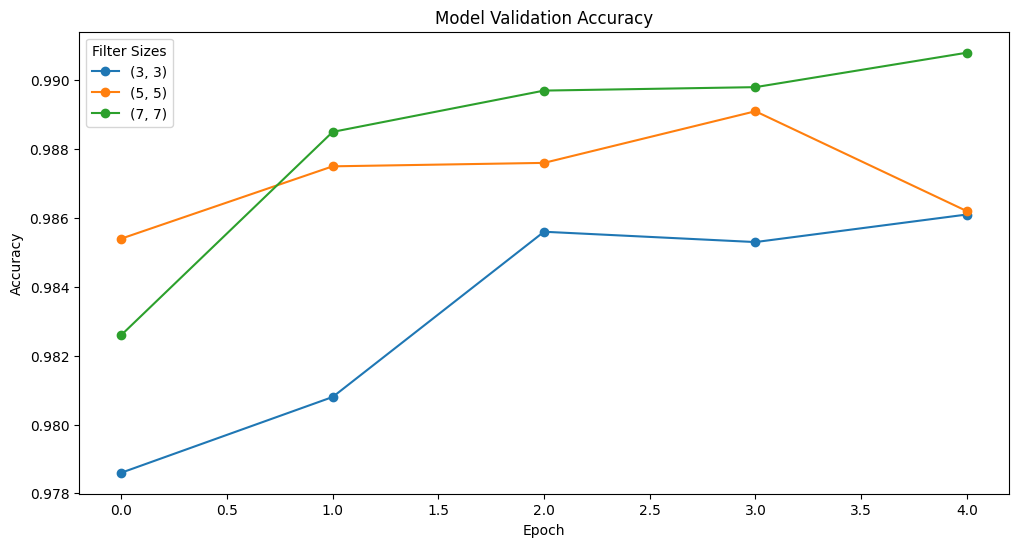


Best Model Information:
Filter Size: (7, 7)
Training Accuracy: 0.9930
Test Accuracy: 0.9908
Number of Parameters: 54330
Training Time: 37.30 seconds


In [12]:
# Visualize accuracy and loss
plt.figure(figsize=(12, 6))

for history in histories:
    plt.plot(history.history['val_accuracy'], marker='o')

plt.title('Model Validation Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(filter_sizes_list, title='Filter Sizes')
plt.show()

# Find the best model based on test accuracy
best_model_index = max(range(len(test_accuracies)), key=lambda i: test_accuracies[i])
best_filter_size = filter_sizes_list[best_model_index]
best_train_accuracy = train_accuracies[best_model_index]
best_test_accuracy = test_accuracies[best_model_index]
best_num_parameters = num_parameters_list[best_model_index]
best_training_time = training_times[best_model_index]

print("\n" + "=" * 40)
print("Best Model Information:")
print("=" * 40)
print(f"Filter Size: {best_filter_size}")
print(f"Training Accuracy: {best_train_accuracy:.4f}")
print(f"Test Accuracy: {best_test_accuracy:.4f}")
print(f"Number of Parameters: {best_num_parameters}")
print(f"Training Time: {best_training_time:.2f} seconds")


### STEP 4

In [13]:
def run_cnn_with_different_activations(activation_function, num_epochs):
    # Load the MNIST dataset
    (x_train, y_train), (x_test, y_test) = mnist.load_data()

    # Normalize and reshape the data
    x_train = x_train.reshape(-1, 28, 28, 1) / 255.0
    x_test = x_test.reshape(-1, 28, 28, 1) / 255.0

    # Create the CNN model with the specified activation function
    model = Sequential([
        Conv2D(16, (3, 3), activation=activation_function, input_shape=(28, 28, 1)),
        Conv2D(16, (3, 3), activation=activation_function),
        Flatten(),
        Dense(10, activation=activation_function)
    ])

    # Compile the model
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

    # Train the model and measure training time
    start_time = time.time()
    history = model.fit(x_train, y_train, epochs=num_epochs, validation_data=(x_test, y_test))
    end_time = time.time()
    training_time = end_time - start_time

    # Calculate training and testing accuracies
    train_accuracy = history.history['accuracy'][-1]
    test_accuracy = history.history['val_accuracy'][-1]

    # Calculate the number of parameters
    num_parameters = model.count_params()

    return history, train_accuracy, test_accuracy, num_parameters, training_time

activation_functions = ['sigmoid', 'tanh', 'relu']
num_epochs_list = [5, 10]

histories = []
train_accuracies = []
test_accuracies = []
num_parameters_list = []
training_times = []

In [14]:
# Run models with different activation functions and epochs
for activation_function in activation_functions:
    for num_epochs in num_epochs_list:
        print("\n" + "=" * 40)
        print(f"Activation Function: {activation_function}, Epochs: {num_epochs}")
        print("=" * 40)

        history, train_accuracy, test_accuracy, num_parameters, training_time = run_cnn_with_different_activations(activation_function, num_epochs)
        histories.append(history)
        train_accuracies.append(train_accuracy)
        test_accuracies.append(test_accuracy)
        num_parameters_list.append(num_parameters)
        training_times.append(training_time)

        print(f"Training Accuracy: {train_accuracy:.4f}")
        print(f"Test Accuracy: {test_accuracy:.4f}")
        print(f"Number of Parameters: {num_parameters}")
        print(f"Training Time: {training_time:.2f} seconds")

        print("\n" + "=" * 120)


Activation Function: sigmoid, Epochs: 5
Epoch 1/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.6035 - accuracy: 0.8105 - val_loss: 0.3190 - val_accuracy: 0.9050
Epoch 2/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2847 - accuracy: 0.9157 - val_loss: 0.2442 - val_accuracy: 0.9329
Epoch 3/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1988 - accuracy: 0.9411 - val_loss: 0.1603 - val_accuracy: 0.9526
Epoch 4/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1584 - accuracy: 0.9528 - val_loss: 0.1506 - val_accuracy: 0.9571
Epoch 5/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1383 - accuracy: 0.9578 - val_loss: 0.1331 - val_accuracy: 0.9610
Training Accuracy: 0.9578
Test Accuracy: 0.9610
Number of Parameters: 94650
Training Time: 41.84 seconds


Activation Function: sigmoid, Epochs: 10
Epoch 1/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.6931 - accuracy: 0

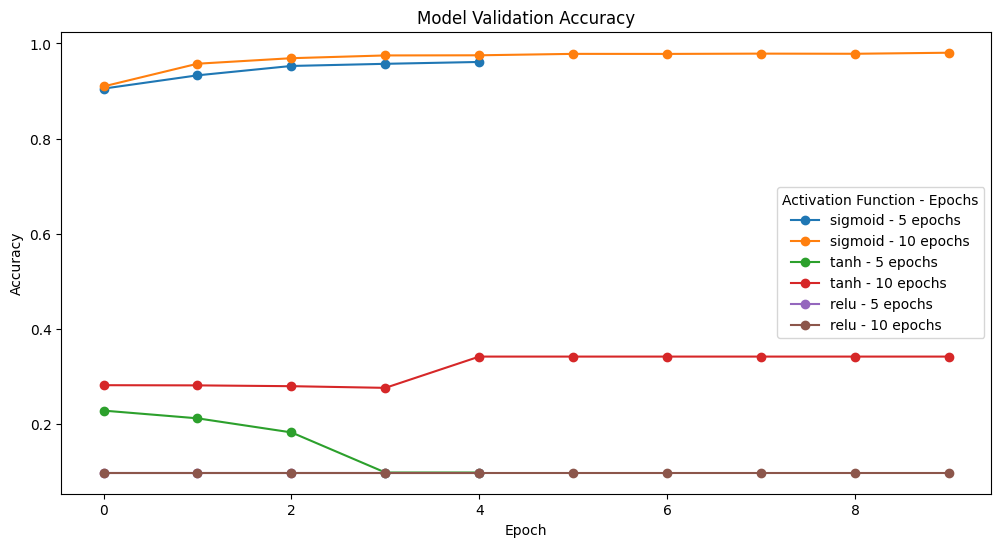

Best Model: Activation Function: sigmoid, Epochs: 10
Training Accuracy: 0.9864
Test Accuracy: 0.9804
Number of Parameters: 94650
Training Time: 82.82 seconds


In [15]:
# Visualize accuracy and loss
plt.figure(figsize=(12, 6))

for history in histories:
    plt.plot(history.history['val_accuracy'], marker='o')

plt.title('Model Validation Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend([f'{af} - {epochs} epochs' for af in activation_functions for epochs in num_epochs_list], title='Activation Function - Epochs')
plt.show()

# Find the best model based on test accuracy
best_model_index = max(range(len(test_accuracies)), key=lambda i: test_accuracies[i])
best_activation = activation_functions[best_model_index // len(num_epochs_list)]
best_num_epochs = num_epochs_list[best_model_index % len(num_epochs_list)]
best_train_accuracy = train_accuracies[best_model_index]
best_test_accuracy = test_accuracies[best_model_index]
best_num_parameters = num_parameters_list[best_model_index]
best_training_time = training_times[best_model_index]

print(f"Best Model: Activation Function: {best_activation}, Epochs: {best_num_epochs}")
print(f"Training Accuracy: {best_train_accuracy:.4f}")
print(f"Test Accuracy: {best_test_accuracy:.4f}")
print(f"Number of Parameters: {best_num_parameters}")
print(f"Training Time: {best_training_time:.2f} seconds")


### STEP 5

In [16]:
def run_cnn_with_different_filter_combinations(filter_combination, num_epochs):
    # Load the MNIST dataset
    (x_train, y_train), (x_test, y_test) = mnist.load_data()

    # Normalize and reshape the data
    x_train = x_train.reshape(-1, 28, 28, 1) / 255.0
    x_test = x_test.reshape(-1, 28, 28, 1) / 255.0

    # Create the CNN model with the specified filter combination
    model = Sequential([
        Conv2D(16, filter_combination[0], activation='relu', input_shape=(28, 28, 1)),
        Conv2D(16, filter_combination[1], activation='relu'),
        Flatten(),
        Dense(10, activation='softmax')
    ])

    # Compile the model
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

    # Train the model and measure training time
    start_time = time.time()
    history = model.fit(x_train, y_train, epochs=num_epochs, validation_data=(x_test, y_test))
    end_time = time.time()
    training_time = end_time - start_time

    # Calculate training and testing accuracies
    train_accuracy = history.history['accuracy'][-1]
    test_accuracy = history.history['val_accuracy'][-1]

    # Calculate the number of parameters
    num_parameters = model.count_params()

    return history, train_accuracy, test_accuracy, num_parameters, training_time

In [17]:
filter_combinations_list = [((3, 3), (3, 3)), ((3, 3), (5, 5)), ((5, 5), (3, 3)), ((5, 5), (5, 5))]
num_epochs = 5

histories = []
train_accuracies = []
test_accuracies = []
num_parameters_list = []
training_times = []

# Run models with different filter combinations
for filter_combination in filter_combinations_list:
    history, train_accuracy, test_accuracy, num_parameters, training_time = run_cnn_with_different_filter_combinations(filter_combination, num_epochs)
    histories.append(history)
    train_accuracies.append(train_accuracy)
    test_accuracies.append(test_accuracy)
    num_parameters_list.append(num_parameters)
    training_times.append(training_time)

    print("\n" + "=" * 40)
    print(f"Filter Combination: {filter_combination}")
    print("=" * 40)
    print(f"Training Accuracy: {train_accuracy:.4f}")
    print(f"Test Accuracy: {test_accuracy:.4f}")
    print(f"Number of Parameters: {num_parameters}")
    print(f"Training Time: {training_time:.2f} seconds")
    print("=" * 120)

Epoch 1/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1536 - accuracy: 0.9543 - val_loss: 0.0792 - val_accuracy: 0.9765
Epoch 2/5
1875/1875 [==============================] - 7s 3ms/step - loss: 0.0587 - accuracy: 0.9823 - val_loss: 0.0534 - val_accuracy: 0.9839
Epoch 3/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0407 - accuracy: 0.9870 - val_loss: 0.0497 - val_accuracy: 0.9851
Epoch 4/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0291 - accuracy: 0.9910 - val_loss: 0.0503 - val_accuracy: 0.9854
Epoch 5/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0218 - accuracy: 0.9929 - val_loss: 0.0496 - val_accuracy: 0.9852

Filter Combination: ((3, 3), (3, 3))
Training Accuracy: 0.9929
Test Accuracy: 0.9852
Number of Parameters: 94650
Training Time: 41.86 seconds
Epoch 1/5
1875/1875 [==============================] - 9s 4ms/step - loss: 0.1368 - accuracy: 0.9595 - val_loss: 0.0580 - val_accuracy: 0.9801

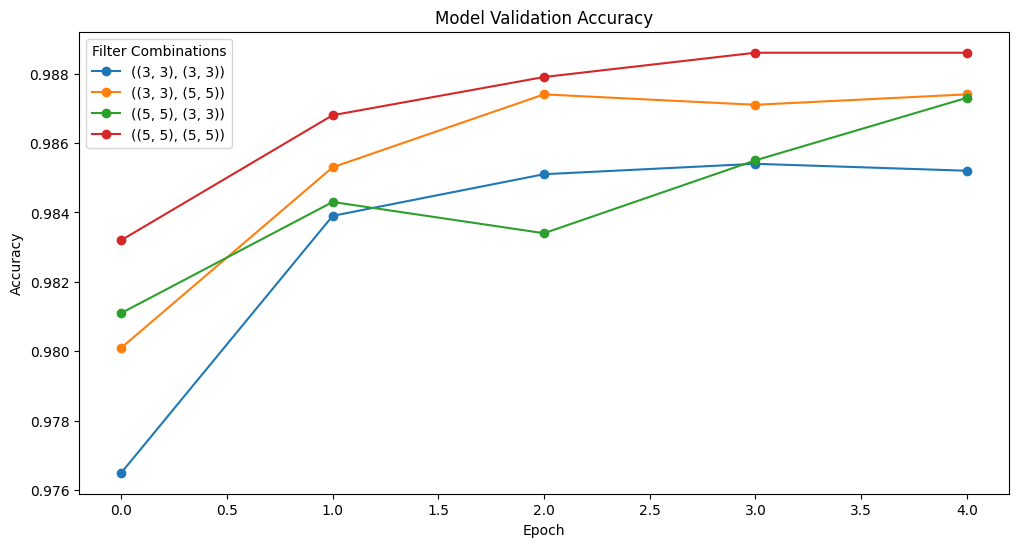


Best Model: Filter Combination: ((5, 5), (5, 5))
Training Accuracy: 0.9935
Test Accuracy: 0.9886
Number of Parameters: 70842
Training Time: 41.84 seconds


In [18]:
# Visualize accuracy and loss
plt.figure(figsize=(12, 6))

for history in histories:
    plt.plot(history.history['val_accuracy'], marker='o')

plt.title('Model Validation Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend([str(fc) for fc in filter_combinations_list], title='Filter Combinations')
plt.show()

# Find the best model based on test accuracy
best_model_index = max(range(len(test_accuracies)), key=lambda i: test_accuracies[i])
best_filter_combination = filter_combinations_list[best_model_index]
best_train_accuracy = train_accuracies[best_model_index]
best_test_accuracy = test_accuracies[best_model_index]
best_num_parameters = num_parameters_list[best_model_index]
best_training_time = training_times[best_model_index]

print(f"\nBest Model: Filter Combination: {best_filter_combination}")
print(f"Training Accuracy: {best_train_accuracy:.4f}")
print(f"Test Accuracy: {best_test_accuracy:.4f}")
print(f"Number of Parameters: {best_num_parameters}")
print(f"Training Time: {best_training_time:.2f} seconds")

### STEP 6

In [19]:
def run_cnn_with_different_architectures(architecture, num_epochs):
    # Load the MNIST dataset
    (x_train, y_train), (x_test, y_test) = mnist.load_data()

    # Normalize and reshape the data
    x_train = x_train.reshape(-1, 28, 28, 1) / 255.0
    x_test = x_test.reshape(-1, 28, 28, 1) / 255.0

    # Create the CNN model with the specified architecture
    model = Sequential(architecture)

    # Compile the model
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

    # Train the model and measure training time
    start_time = time.time()
    history = model.fit(x_train, y_train, epochs=num_epochs, validation_data=(x_test, y_test))
    end_time = time.time()
    training_time = end_time - start_time

    # Calculate training and testing accuracies
    train_accuracy = history.history['accuracy'][-1]
    test_accuracy = history.history['val_accuracy'][-1]

    # Calculate the number of parameters
    num_parameters = model.count_params()

    return history, train_accuracy, test_accuracy, num_parameters, training_time

architectures_list = [
    [
        Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
        Flatten(),
        Dense(10, activation='softmax')
    ],
    [
        Conv2D(16, (3, 3), activation='relu', input_shape=(28, 28, 1)),
        Conv2D(16, (3, 3), activation='relu'),
        Flatten(),
        Dense(10, activation='softmax')
    ],
]

In [20]:
num_epochs = 5

histories = []
train_accuracies = []
test_accuracies = []
num_parameters_list = []
training_times = []

# Run models with different architectures
for architecture in architectures_list:
    history, train_accuracy, test_accuracy, num_parameters, training_time = run_cnn_with_different_architectures(architecture, num_epochs)
    histories.append(history)
    train_accuracies.append(train_accuracy)
    test_accuracies.append(test_accuracy)
    num_parameters_list.append(num_parameters)
    training_times.append(training_time)

    print("\n" + "=" * 40)
    print("Architecture:")
    for layer in architecture:
        print(layer)
    print("=" * 40)
    print(f"Training Accuracy: {train_accuracy:.4f}")
    print(f"Test Accuracy: {test_accuracy:.4f}")
    print(f"Number of Parameters: {num_parameters}")
    print(f"Training Time: {training_time:.2f} seconds")
    print("=" * 120)

Epoch 1/5
1875/1875 [==============================] - 7s 3ms/step - loss: 0.1721 - accuracy: 0.9503 - val_loss: 0.0736 - val_accuracy: 0.9769
Epoch 2/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0656 - accuracy: 0.9804 - val_loss: 0.0645 - val_accuracy: 0.9806
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0460 - accuracy: 0.9861 - val_loss: 0.0598 - val_accuracy: 0.9806
Epoch 4/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0348 - accuracy: 0.9891 - val_loss: 0.0591 - val_accuracy: 0.9816
Epoch 5/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0258 - accuracy: 0.9921 - val_loss: 0.0702 - val_accuracy: 0.9788

Architecture:
Training Accuracy: 0.9921
Test Accuracy: 0.9788
Number of Parameters: 216650
Training Time: 30.24 seconds
Epoch 1/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1549 - accuracy: 0.9545 - val_loss: 0.0687 - val_accuracy: 0.9786
Epoch 2/5
1875/1875 [

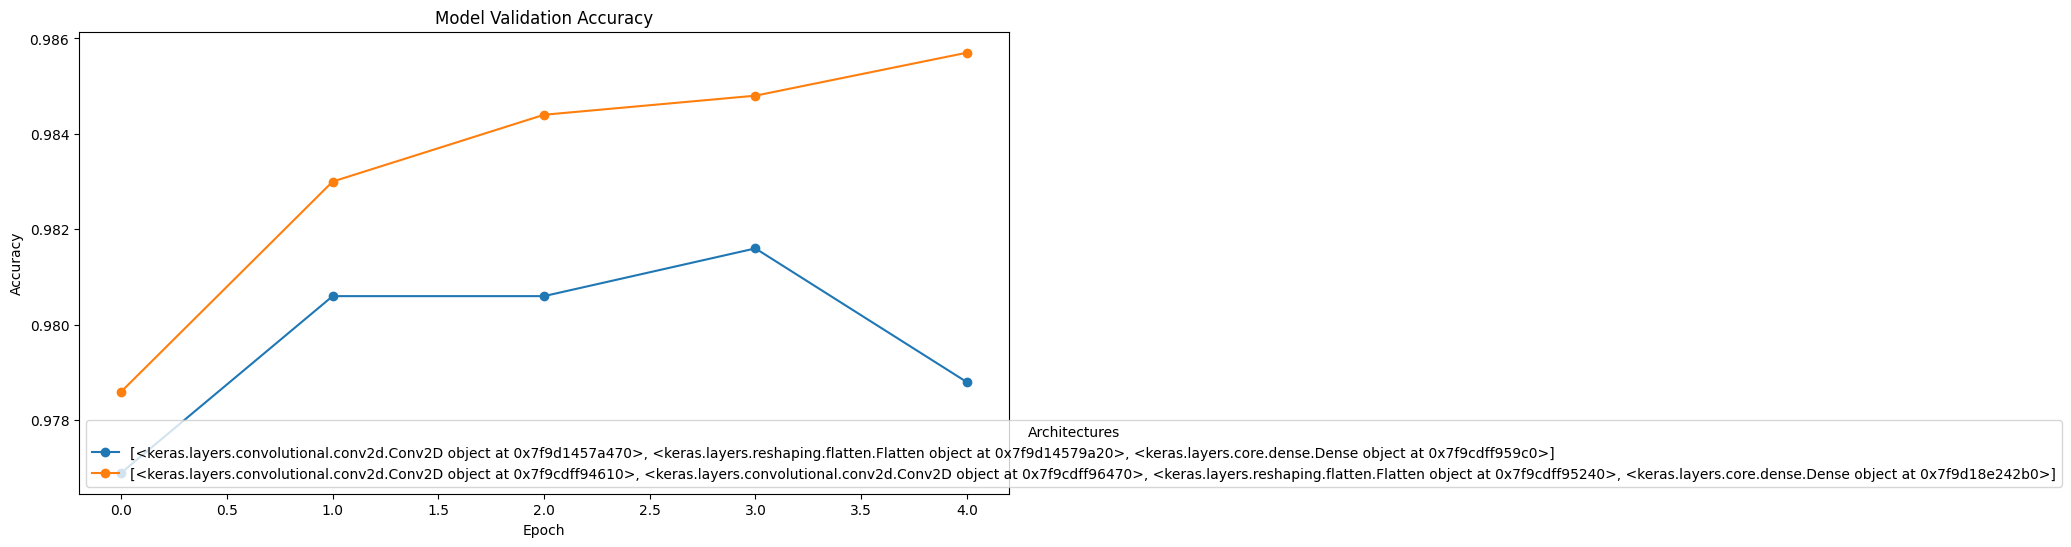


Best Model: Architecture:
Training Accuracy: 0.9922
Test Accuracy: 0.9857
Number of Parameters: 94650
Training Time: 41.87 seconds


In [21]:
# Visualize accuracy and loss
plt.figure(figsize=(12, 6))

for history in histories:
    plt.plot(history.history['val_accuracy'], marker='o')

plt.title('Model Validation Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend([str(arch) for arch in architectures_list], title='Architectures')
plt.show()

# Find the best model based on test accuracy
best_model_index = max(range(len(test_accuracies)), key=lambda i: test_accuracies[i])
best_architecture = architectures_list[best_model_index]
best_train_accuracy = train_accuracies[best_model_index]
best_test_accuracy = test_accuracies[best_model_index]
best_num_parameters = num_parameters_list[best_model_index]
best_training_time = training_times[best_model_index]

print(f"\nBest Model: Architecture:")
for layer in best_architecture:
    print(layer)
print(f"Training Accuracy: {best_train_accuracy:.4f}")
print(f"Test Accuracy: {best_test_accuracy:.4f}")
print(f"Number of Parameters: {best_num_parameters}")
print(f"Training Time: {best_training_time:.2f} seconds")

### STEP 7

In [22]:
def run_cnn_with_different_configurations(filters, strides, filter_size, num_epochs):
    # Load the MNIST dataset
    (x_train, y_train), (x_test, y_test) = mnist.load_data()

    # Normalize and reshape the data
    x_train = x_train.reshape(-1, 28, 28, 1) / 255.0
    x_test = x_test.reshape(-1, 28, 28, 1) / 255.0

    # Create the CNN model with the specified configuration
    model = Sequential([
        Conv2D(filters, filter_size, strides=strides, activation='relu', input_shape=(28, 28, 1)),
        Conv2D(filters, filter_size, strides=strides, activation='relu'),
        Flatten(),
        Dense(10, activation='softmax')
    ])

    # Compile the model
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

    # Train the model and measure training time
    start_time = time.time()
    history = model.fit(x_train, y_train, epochs=num_epochs, validation_data=(x_test, y_test))
    end_time = time.time()
    training_time = end_time - start_time

    # Calculate training and testing accuracies
    train_accuracy = history.history['accuracy'][-1]
    test_accuracy = history.history['val_accuracy'][-1]

    # Calculate the number of parameters
    num_parameters = model.count_params()

    return history, train_accuracy, test_accuracy, num_parameters, training_time

In [23]:
filter_sizes = [(3, 3), (5, 5), (7, 7)]
strides_list = [1, 2, 3]
filters = 32
num_epochs = 5

histories = []
train_accuracies = []
test_accuracies = []
num_parameters_list = []
training_times = []

# Run models with different configurations
for filter_size in filter_sizes:
    for strides in strides_list:
        history, train_accuracy, test_accuracy, num_parameters, training_time = run_cnn_with_different_configurations(filters, strides, filter_size, num_epochs)
        histories.append(history)
        train_accuracies.append(train_accuracy)
        test_accuracies.append(test_accuracy)
        num_parameters_list.append(num_parameters)
        training_times.append(training_time)

        print("\n" + "=" * 40)
        print(f"Filter Size: {filter_size}, Strides: {strides}")
        print("=" * 40)
        print(f"Training Accuracy: {train_accuracy:.4f}")
        print(f"Test Accuracy: {test_accuracy:.4f}")
        print(f"Number of Parameters: {num_parameters}")
        print(f"Training Time: {training_time:.2f} seconds")
        print("=" * 120)

Epoch 1/5
1875/1875 [==============================] - 9s 4ms/step - loss: 0.1345 - accuracy: 0.9608 - val_loss: 0.0513 - val_accuracy: 0.9833
Epoch 2/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0510 - accuracy: 0.9845 - val_loss: 0.0448 - val_accuracy: 0.9863
Epoch 3/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0328 - accuracy: 0.9898 - val_loss: 0.0444 - val_accuracy: 0.9844
Epoch 4/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0220 - accuracy: 0.9931 - val_loss: 0.0414 - val_accuracy: 0.9866
Epoch 5/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0154 - accuracy: 0.9948 - val_loss: 0.0473 - val_accuracy: 0.9866

Filter Size: (3, 3), Strides: 1
Training Accuracy: 0.9948
Test Accuracy: 0.9866
Number of Parameters: 193898
Training Time: 35.57 seconds
Epoch 1/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2304 - accuracy: 0.9325 - val_loss: 0.0859 - val_accuracy: 0.9728
Epo

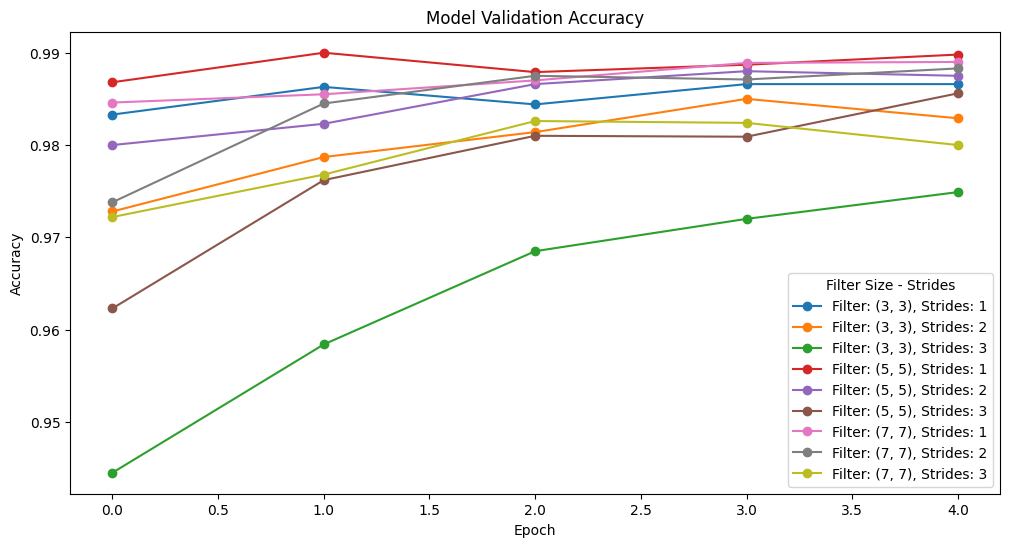


Best Model: Filter Size: (5, 5), Strides: 1
Training Accuracy: 0.9953
Test Accuracy: 0.9898
Number of Parameters: 154474
Training Time: 36.92 seconds


In [24]:
# Visualize accuracy and loss
plt.figure(figsize=(12, 6))

for history in histories:
    plt.plot(history.history['val_accuracy'], marker='o')

plt.title('Model Validation Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend([f'Filter: {filter_size}, Strides: {strides}' for filter_size in filter_sizes for strides in strides_list], title='Filter Size - Strides')
plt.show()

# Find the best model based on test accuracy
best_model_index = max(range(len(test_accuracies)), key=lambda i: test_accuracies[i])
best_filter_size = filter_sizes[best_model_index // len(strides_list)]
best_strides = strides_list[best_model_index % len(strides_list)]
best_train_accuracy = train_accuracies[best_model_index]
best_test_accuracy = test_accuracies[best_model_index]
best_num_parameters = num_parameters_list[best_model_index]
best_training_time = training_times[best_model_index]

print(f"\nBest Model: Filter Size: {best_filter_size}, Strides: {best_strides}")
print(f"Training Accuracy: {best_train_accuracy:.4f}")
print(f"Test Accuracy: {best_test_accuracy:.4f}")
print(f"Number of Parameters: {best_num_parameters}")
print(f"Training Time: {best_training_time:.2f} seconds")

### STEP 8

In [25]:
def run_cnn_with_different_padding_filter_configurations(filters, filter_size, padding, num_epochs):
    # Load the MNIST dataset
    (x_train, y_train), (x_test, y_test) = mnist.load_data()

    # Normalize and reshape the data
    x_train = x_train.reshape(-1, 28, 28, 1) / 255.0
    x_test = x_test.reshape(-1, 28, 28, 1) / 255.0

    # Create the CNN model with the specified configuration
    model = Sequential([
        Conv2D(filters, filter_size, activation='relu', input_shape=(28, 28, 1), padding=padding),
        Conv2D(filters, filter_size, activation='relu', padding=padding),
        Flatten(),
        Dense(10, activation='softmax')
    ])

    # Compile the model
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

    # Train the model and measure training time
    start_time = time.time()
    history = model.fit(x_train, y_train, epochs=num_epochs, validation_data=(x_test, y_test))
    end_time = time.time()
    training_time = end_time - start_time

    # Calculate training and testing accuracies
    train_accuracy = history.history['accuracy'][-1]
    test_accuracy = history.history['val_accuracy'][-1]

    # Calculate the number of parameters
    num_parameters = model.count_params()

    return history, train_accuracy, test_accuracy, num_parameters, training_time

In [26]:
filter_sizes = [(3, 3), (5, 5), (7, 7)]
padding_list = ['valid', 'same']
filters = 32
num_epochs = 5

histories = []
train_accuracies = []
test_accuracies = []
num_parameters_list = []
training_times = []

# Run models with different configurations
for filter_size in filter_sizes:
    for padding in padding_list:
        history, train_accuracy, test_accuracy, num_parameters, training_time = run_cnn_with_different_padding_filter_configurations(filters, filter_size, padding, num_epochs)
        histories.append(history)
        train_accuracies.append(train_accuracy)
        test_accuracies.append(test_accuracy)
        num_parameters_list.append(num_parameters)
        training_times.append(training_time)

        print("\n" + "=" * 40)
        print(f"Filter Size: {filter_size}, Padding: {padding}")
        print("=" * 40)
        print(f"Training Accuracy: {train_accuracy:.4f}")
        print(f"Test Accuracy: {test_accuracy:.4f}")
        print(f"Number of Parameters: {num_parameters}")
        print(f"Training Time: {training_time:.2f} seconds")
        print("=" * 120)

Epoch 1/5
1875/1875 [==============================] - 8s 3ms/step - loss: 0.1311 - accuracy: 0.9610 - val_loss: 0.0563 - val_accuracy: 0.9819
Epoch 2/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0485 - accuracy: 0.9847 - val_loss: 0.0395 - val_accuracy: 0.9862
Epoch 3/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0304 - accuracy: 0.9906 - val_loss: 0.0416 - val_accuracy: 0.9872
Epoch 4/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0213 - accuracy: 0.9928 - val_loss: 0.0446 - val_accuracy: 0.9861
Epoch 5/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0147 - accuracy: 0.9951 - val_loss: 0.0404 - val_accuracy: 0.9879

Filter Size: (3, 3), Padding: valid
Training Accuracy: 0.9951
Test Accuracy: 0.9879
Number of Parameters: 193898
Training Time: 41.86 seconds
Epoch 1/5
1875/1875 [==============================] - 9s 4ms/step - loss: 0.1296 - accuracy: 0.9598 - val_loss: 0.0588 - val_accuracy: 0.9823

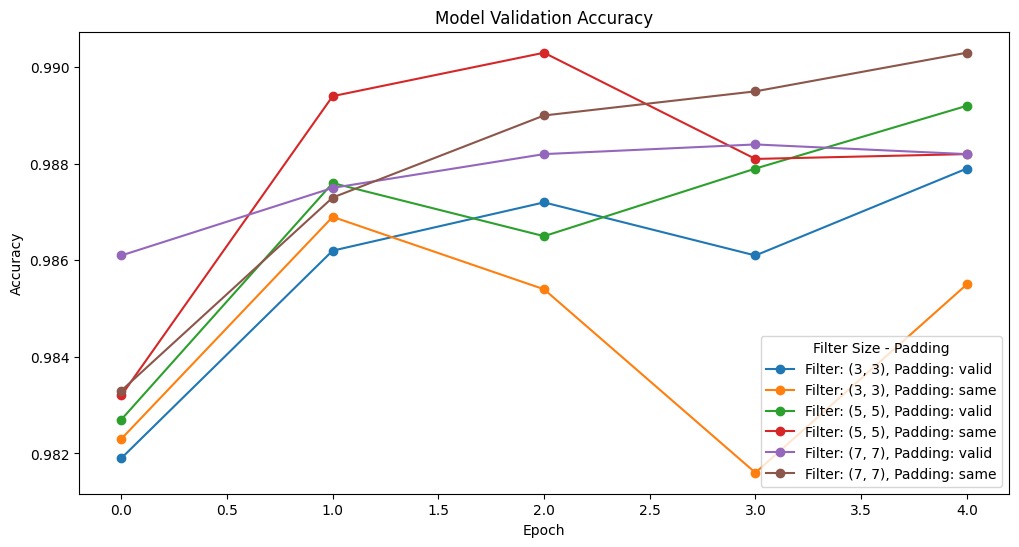


Best Model: Filter Size: (7, 7), Padding: same
Training Accuracy: 0.9957
Test Accuracy: 0.9903
Number of Parameters: 302698
Training Time: 48.19 seconds


In [27]:
# Visualize accuracy and loss
plt.figure(figsize=(12, 6))

for history in histories:
    plt.plot(history.history['val_accuracy'], marker='o')

plt.title('Model Validation Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend([f'Filter: {filter_size}, Padding: {padding}' for filter_size in filter_sizes for padding in padding_list], title='Filter Size - Padding')
plt.show()

# Find the best model based on test accuracy
best_model_index = max(range(len(test_accuracies)), key=lambda i: test_accuracies[i])
best_filter_size = filter_sizes[best_model_index // len(padding_list)]
best_padding = padding_list[best_model_index % len(padding_list)]
best_train_accuracy = train_accuracies[best_model_index]
best_test_accuracy = test_accuracies[best_model_index]
best_num_parameters = num_parameters_list[best_model_index]
best_training_time = training_times[best_model_index]

print(f"\nBest Model: Filter Size: {best_filter_size}, Padding: {best_padding}")
print(f"Training Accuracy: {best_train_accuracy:.4f}")
print(f"Test Accuracy: {best_test_accuracy:.4f}")
print(f"Number of Parameters: {best_num_parameters}")
print(f"Training Time: {best_training_time:.2f} seconds")

### STEP 9

In [28]:
def run_cnn_with_different_pooling_filter_configurations(filters, filter_size, pooling_size, num_epochs):
    # Load the MNIST dataset
    (x_train, y_train), (x_test, y_test) = mnist.load_data()

    # Normalize and reshape the data
    x_train = x_train.reshape(-1, 28, 28, 1) / 255.0
    x_test = x_test.reshape(-1, 28, 28, 1) / 255.0

    # Create the CNN model with the specified configuration
    model = Sequential([
        Conv2D(filters, filter_size, activation='relu', input_shape=(28, 28, 1)),
        MaxPooling2D(pool_size=pooling_size),
        Conv2D(filters, filter_size, activation='relu'),
        MaxPooling2D(pool_size=pooling_size),
        Flatten(),
        Dense(10, activation='softmax')
    ])

    # Compile the model
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

    # Train the model and measure training time
    start_time = time.time()
    history = model.fit(x_train, y_train, epochs=num_epochs, validation_data=(x_test, y_test))
    end_time = time.time()
    training_time = end_time - start_time

    # Calculate training and testing accuracies
    train_accuracy = history.history['accuracy'][-1]
    test_accuracy = history.history['val_accuracy'][-1]

    # Calculate the number of parameters
    num_parameters = model.count_params()

    return history, train_accuracy, test_accuracy, num_parameters, training_time

In [31]:
from tensorflow.keras.layers import MaxPooling2D

filter_sizes = [(3, 3), (5, 5)]
pooling_sizes = [(2, 2), (3, 3)]
filters = 32
num_epochs = 5

histories = []
train_accuracies = []
test_accuracies = []
num_parameters_list = []
training_times = []

# Run models with different configurations
for filter_size in filter_sizes:
    for pooling_size in pooling_sizes:
        history, train_accuracy, test_accuracy, num_parameters, training_time = run_cnn_with_different_pooling_filter_configurations(filters, filter_size, pooling_size, num_epochs)
        histories.append(history)
        train_accuracies.append(train_accuracy)
        test_accuracies.append(test_accuracy)
        num_parameters_list.append(num_parameters)
        training_times.append(training_time)

        print("\n" + "=" * 40)
        print(f"Filter Size: {filter_size}, Pooling Size: {pooling_size}")
        print("=" * 40)
        print(f"Training Accuracy: {train_accuracy:.4f}")
        print(f"Test Accuracy: {test_accuracy:.4f}")
        print(f"Number of Parameters: {num_parameters}")
        print(f"Training Time: {training_time:.2f} seconds")
        print("=" * 120)

Epoch 1/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1800 - accuracy: 0.9454 - val_loss: 0.0713 - val_accuracy: 0.9783
Epoch 2/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0618 - accuracy: 0.9812 - val_loss: 0.0496 - val_accuracy: 0.9842
Epoch 3/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0458 - accuracy: 0.9862 - val_loss: 0.0529 - val_accuracy: 0.9829
Epoch 4/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0374 - accuracy: 0.9886 - val_loss: 0.0351 - val_accuracy: 0.9875
Epoch 5/5
1875/1875 [==============================] - 7s 3ms/step - loss: 0.0297 - accuracy: 0.9907 - val_loss: 0.0331 - val_accuracy: 0.9895

Filter Size: (3, 3), Pooling Size: (2, 2)
Training Accuracy: 0.9907
Test Accuracy: 0.9895
Number of Parameters: 17578
Training Time: 41.87 seconds
Epoch 1/5
1875/1875 [==============================] - 8s 3ms/step - loss: 0.2877 - accuracy: 0.9140 - val_loss: 0.1176 - val_accuracy: 0

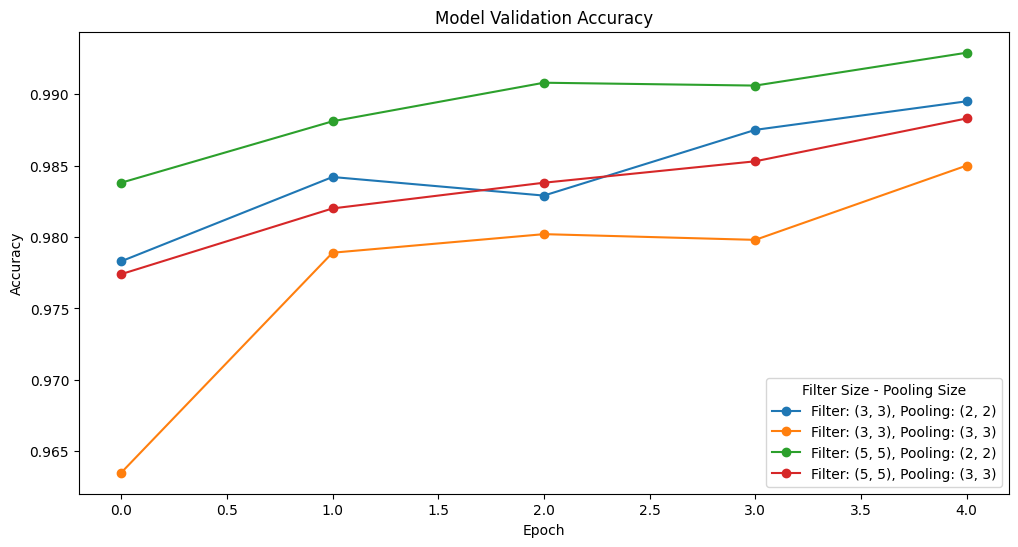


Best Model: Filter Size: (5, 5), Pooling Size: (2, 2)
Training Accuracy: 0.9926
Test Accuracy: 0.9929
Number of Parameters: 31594
Training Time: 41.90 seconds


In [32]:
# Visualize accuracy and loss
plt.figure(figsize=(12, 6))

for history in histories:
    plt.plot(history.history['val_accuracy'], marker='o')

plt.title('Model Validation Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend([f'Filter: {filter_size}, Pooling: {pooling_size}' for filter_size in filter_sizes for pooling_size in pooling_sizes], title='Filter Size - Pooling Size')
plt.show()

# Find the best model based on test accuracy
best_model_index = max(range(len(test_accuracies)), key=lambda i: test_accuracies[i])
best_filter_size = filter_sizes[best_model_index // len(pooling_sizes)]
best_pooling_size = pooling_sizes[best_model_index % len(pooling_sizes)]
best_train_accuracy = train_accuracies[best_model_index]
best_test_accuracy = test_accuracies[best_model_index]
best_num_parameters = num_parameters_list[best_model_index]
best_training_time = training_times[best_model_index]

print(f"\nBest Model: Filter Size: {best_filter_size}, Pooling Size: {best_pooling_size}")
print(f"Training Accuracy: {best_train_accuracy:.4f}")
print(f"Test Accuracy: {best_test_accuracy:.4f}")
print(f"Number of Parameters: {best_num_parameters}")
print(f"Training Time: {best_training_time:.2f} seconds")